The deadline for this homework is on **17.06.2022 15:49** (right before the practice session). After completing the exercises, you should

1. Download this file into your computer (`File` $\to$ `Download .ipynb`)

2. Download the python files (`.py`) (*if there are any attached to the homework that you need to complete*). 

3. Compress the above files (`.zip` `.rar`) and name the compressed file in the following way *HWx_NameSurname* (for example `HW8_AnunAzganun.zip`)

4. Send the compressed file to this email address `fast.1991.ml@gmail.com` with subject **ML8**

**Note**

* if you do not follow any of the above conditions, your homework will not be graded.

* you do not need to send any dataset files or helper scripts that I provide with your homework (since I already have them).

* you need to write the code for the exercises yourself; you can use ``built-in functions``, ``numpy``, ``pandas``
and ``matplotlib``. Use of other libraries or packages (e.g., scikit-learn) will result in points deducted.

# Mounting Google Drive

1. Create a folder named ``ML`` in your drive

2. Upload the compressed file ``hw8.zip`` into that folder

3. Run the below code snippet and follow the instructions to give access to Colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

4. We will change our current directory, so that it is easier to import the necessary files from our drive. To do so, just run the below code cell

In [ ]:
cd drive/MyDrive/ML

5. Now that we are in the desired location, we can unzip the compressed file. 

  **Note that this step needs to be done only once**

In [ ]:
!unzip hw8.zip

# Support Vector Machine

Complete the code in `svm.py`. For that first you need to get familiar with one of the following packages for solving convex optimization problems in Python:

* [`cvxopt`](https://courses.csail.mit.edu/6.867/wiki/images/a/a7/Qp-cvxopt.pdf) 

* [`cvxpy`](https://www.cvxpy.org/examples/basic/quadratic_program.html)

Note that the comments and hints in the `svm.py` are written for `cvxopt` but you are encouraged to try `cvxpy`, which is more user-friendly. 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid') # Plot style

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

%load_ext autoreload
%autoreload 2

from svm import SVM

First let's check it on the toy dataset.

In [ ]:
x1 = np.array([5, 6, 7, 7, 8, 9, 0, 1, 2, 4, 5, 6])
x2 = np.array([2, 1, 3, 5, 10, 3, 4, 8, 6, 10, 9, 11])
y = np.array([1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0])

data = pd.DataFrame({'x1': x1, 'x2': x2, 'y': y})
data.head()

**Problem1.** Fit a Hard-margin SVM on the given toy dataset and visualize the decision boundary along with the support vectors marked with stars. Do not forget about encoding the labels ({-1, 1})

In [ ]:
# YOUR CODE HERE

model = SVM(C=0)
model.fit(X, y)

In [ ]:
# YOUR CODE HERE

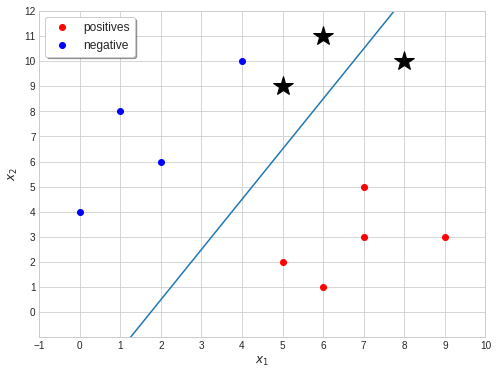

In [ ]:
# The graph should look like this

Now let's check the performance of the algorithm on another synthetic dataset without one of the labels.

In [ ]:
def synthetic_dataset():
    '''Generate 2 Gaussian samples with different covariance matrices'''
    n, dim = 300, 2
    np.random.seed(100)
    cov1 = np.array([[1, -1],
                     [-1, 2]])
     
    cov2 = np.array([[0.5, 0.2],
                     [0.2, 0.5]])
    
    # inputs
    X = np.vstack((np.random.multivariate_normal(mean=[0, 0],
                                                 cov=cov1, size=n),
                   np.random.multivariate_normal(mean=[2.5, 2.5],
                                                 cov=cov2, size=n)
                   ))
    # labels 0, 1
    y = np.hstack((np.zeros(n), np.ones(n)))

    return X, y

Xs, ys = synthetic_dataset()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(Xs, ys,
                                                    test_size=0.25,
                                                    random_state=0)
y_train[y_train == 0] = -1
y_test[y_test == 0] = -1

**Problem2.** Fit a Hard-margin SVM (C=None) and report the accuracy on the test set. Visualize the decision boundary and comment on the results you see.

In [ ]:
# YOUR CODE HERE

**Answer:**

**Problem3.** Now fit 2 Soft-margin SVMs with $C \in \{0.01, 1\}$ and again report the accuracy on the test set. Visualize the decision boundary for both cases and comment on the results you see.

In [ ]:
# YOUR CODE HERE

In [ ]:
# YOUR CODE HERE

**Answer:**

## SVM with kernels

**Problem4:** Complete the incomplete parts in `svm_with_kernels.py` script and import the `SupportVectorMachine`. If you have implemented everything correctly then the test accuracy should be 1 in both cases.

In [ ]:
from svm_with_kernels import SupportVectorMachine
model = SupportVectorMachine(kernel_name='poly')
model.fit(X_train, y_train)
prediction = model.predict(X_test)
accuracy_score(prediction, y_test)

In [ ]:
model = SupportVectorMachine(kernel_name='rbf', gamma=0.2)
model.fit(X_train, y_train)
prediction = model.predict(X_test)
accuracy_score(prediction, y_test)

**Problem5:** Visualize the decision surfaces (areas in different colors for each class) for both of the above models. We have done a similar thing for KNN algorithm.

In [ ]:
# YOUR CODE HERE